## Import libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

## Import dataset

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
# drop id column
df = df.drop('id', axis=1)

In [5]:
df.shape

(70000, 12)

In [6]:
df.isnull().values.any()

False

In [7]:
# check null value 
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## Visualize data

In [8]:
# cardio vascular value count
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

<Axes: xlabel='cardio', ylabel='count'>

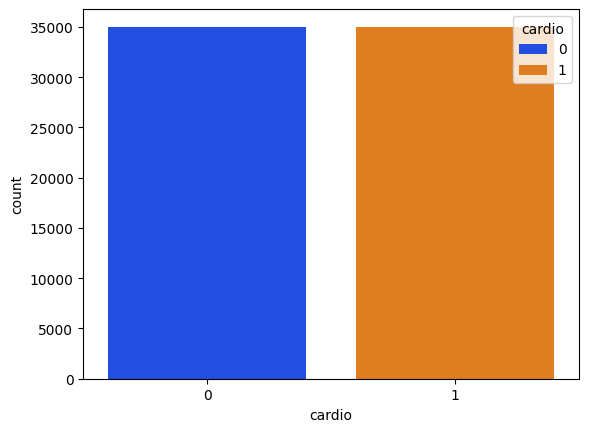

In [9]:
# cardio vascular value count in plot
sns.countplot(x='cardio', data=df, hue='cardio', palette='bright')

<Axes: xlabel='gender', ylabel='count'>

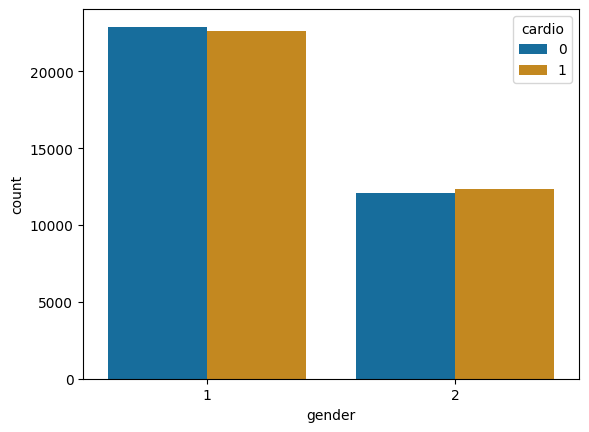

In [10]:
# plot gender wise cardio
sns.countplot(x='gender', hue='cardio', data=df, palette='colorblind')

## Convert Age into Year

In [11]:
df['yr'] = (df['age'] / 365)

In [12]:
df['yr']

0        50.391781
1        55.419178
2        51.663014
3        48.282192
4        47.873973
           ...    
69995    52.712329
69996    61.920548
69997    52.235616
69998    61.454795
69999    56.273973
Name: yr, Length: 70000, dtype: float64

In [13]:
# remove fraction from year
df['yr'] = (df['age'] / 365).round(0)

In [14]:
df['yr']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: yr, Length: 70000, dtype: float64

<Axes: xlabel='yr', ylabel='count'>

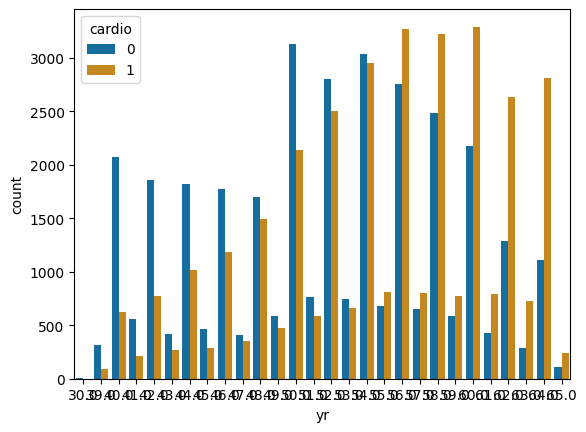

In [15]:
# visualize year wise data
sns.countplot(x='yr', hue='cardio', data=df, palette='colorblind')

In [16]:
# descrive dataset
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [17]:
# show correlation
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,-0.029918


## Seperate dependent & independent variables

In [18]:
# seperate indepedent variable
x = df.drop(['cardio', 'yr'], axis=1)

In [19]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [20]:
# seperate dependent variable
y = df['cardio']

In [21]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

## Split dataset into Train & Test

In [22]:
x_trian, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=42)

In [23]:
x_trian

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
68681,20417,1,160,64.0,120,90,3,1,0,0,1
19961,22690,2,167,65.0,120,80,3,3,0,0,0
11040,22784,1,160,66.0,120,90,1,1,0,0,1
27673,22648,1,163,55.0,125,90,3,1,0,0,1
22876,21712,1,158,85.0,150,80,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
37194,16001,2,170,75.0,150,80,1,1,1,0,1
6265,23209,2,162,73.0,160,90,1,1,0,0,1
54886,23589,1,169,74.0,120,80,1,1,0,0,1
860,18227,1,167,70.0,120,80,1,1,0,0,0


## Use Random Forest Classifier

In [24]:
rclf = RandomForestClassifier()

In [25]:
# train the model using dataset
rclf.fit(x_trian, y_train)

RandomForestClassifier()

In [26]:
# check model accuracy
rclf.score(x_test, y_test)

0.7167142857142857

## Use Decision Tree Classifier

In [27]:
dclf = DecisionTreeClassifier()

In [28]:
# train the model using dataset
dclf.fit(x_trian, y_train)

DecisionTreeClassifier()

In [29]:
# show accuracy
dclf.score(x_test, y_test)

0.6362857142857142

## Use SVM

In [31]:
svm = SVC()

In [32]:
# train the model
svm.fit(x_trian, y_train)

SVC()

In [35]:
# show accuray for the model
svm.score(x_test, y_test)

0.6047619047619047

## Use KNN

In [37]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [38]:
# train the model
neigh.fit(x_trian, y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
# show accuracy for the model
neigh.score(x_test, y_test)

0.6652857142857143

## Logistic Regression

In [45]:
lg = LogisticRegression(random_state=16)

In [46]:
# train the model
lg.fit(x_trian, y_train)

c:\Users\SHAHRIAR\.pyenv\pyenv-win\versions\3.8.6\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

In [47]:
# show accuracy
lg.score(x_test, y_test)

0.7015714285714286

In [50]:
y_pred = lg.predict(x_test)

In [51]:
# confusion metrix
cnf_metrix = metrics.confusion_matrix(y_test, y_pred)

In [52]:
cnf_metrix

array([[7637, 2824],
       [3443, 7096]], dtype=int64)

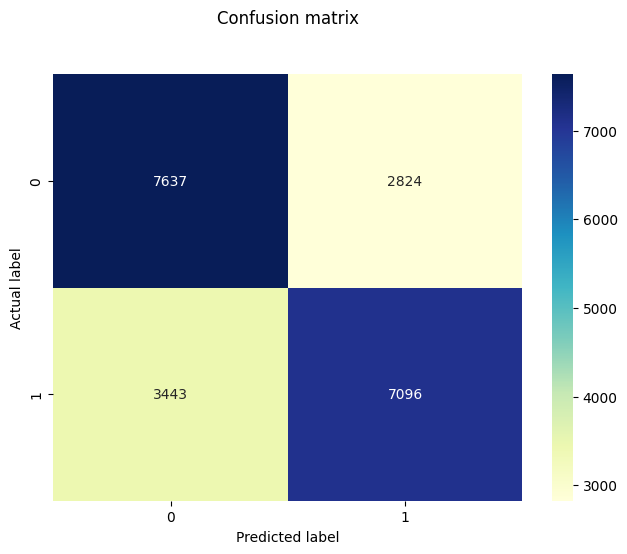

In [53]:
# create heatmap
sns.heatmap(cnf_metrix, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [57]:
# eveluation 
target_names = ['cardio diseases', 'not cardio diseases']
print(classification_report(y_test, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

    cardio diseases       0.69      0.73      0.71     10461
not cardio diseases       0.72      0.67      0.69     10539

           accuracy                           0.70     21000
          macro avg       0.70      0.70      0.70     21000
       weighted avg       0.70      0.70      0.70     21000



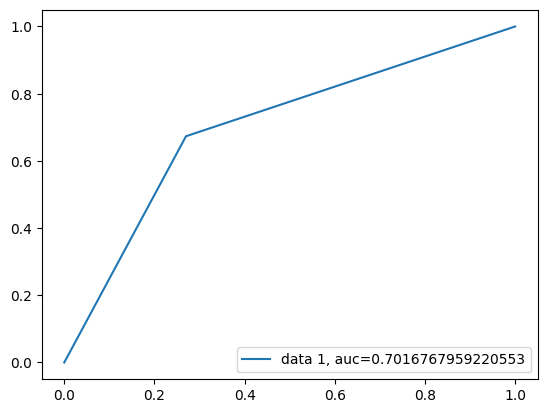

In [58]:
# ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Use Naive Bayes

In [60]:
# Build a Gaussian Classifier
model = GaussianNB()

In [61]:
# Model training
model.fit(x_trian, y_train)

GaussianNB()

In [62]:
# show accuracy
model.score(x_test, y_test)

0.5948571428571429